In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
xx = np.linspace(-1, 1, 250)

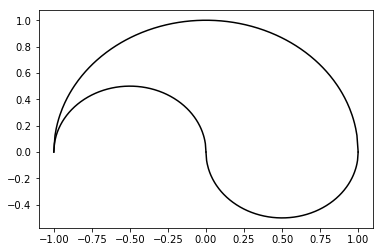

In [3]:
plt.plot(xx, np.sqrt(1 - xx ** 2), c='k')
plt.plot(xx / 2 - 0.5, np.sqrt(1 - xx ** 2) / 2, c='k')
plt.plot(xx / 2 + 0.5, -np.sqrt(1 - xx ** 2) / 2, c='k');

C:\Users\vale\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


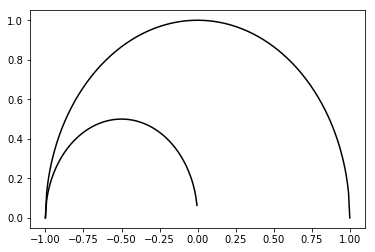

In [4]:
plt.plot(xx, np.sqrt(1 - xx ** 2), c='k')
plt.plot(xx[:200], np.sqrt(1 - ((xx[:200] + 0.5) * 2) ** 2) / 2, c='k');

In [226]:
x = np.linspace(-1.2, 1.2, 50)
y = np.linspace(-1.2, 1.2, 50)

x, y = np.meshgrid(x, y)

x_ = x.flatten()
y_ = y.flatten()

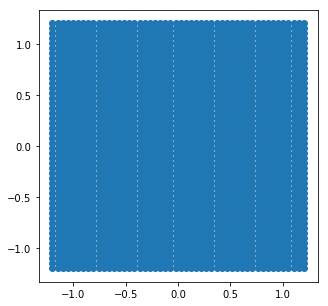

In [227]:
figsize(5, 5)
plt.scatter(x, y);

In [228]:
X = np.vstack((x_, y_)).T

In [229]:
x.shape

(50, 50)

In [230]:
X.shape

(2500, 2)

In [231]:
import SpatialDE

In [376]:
K = SpatialDE.base.SE_kernel(X, 0.12)
I = np.eye(K.shape[0])

In [462]:
Y = np.random.multivariate_normal(0 * X[:, 0] + 2.5, 2. * (1. * K + 0.00 * I))

C:\Users\vale\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':


In [463]:
mask = y_ > np.sqrt(1 - ((x_ + 0.5) * 2) ** 2) / 2
mask ^= y_ > -np.sqrt(1 - ((x_ - 0.5) * 2) ** 2) / 2
mask &= y_ < np.sqrt(1 - x_ ** 2)

C:\Users\vale\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':
C:\Users\vale\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
C:\Users\vale\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app
C:\Users\vale\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app
C:\Users\vale\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()
C:\Users\vale\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()


In [464]:
X.shape

(2500, 2)

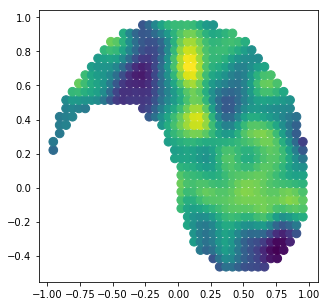

In [465]:
figsize(5, 5)
plt.scatter(*X[mask].T, c=Y[mask], s=75);

In [466]:
from mpl_toolkits.mplot3d import Axes3D

In [467]:
from scipy.interpolate import griddata

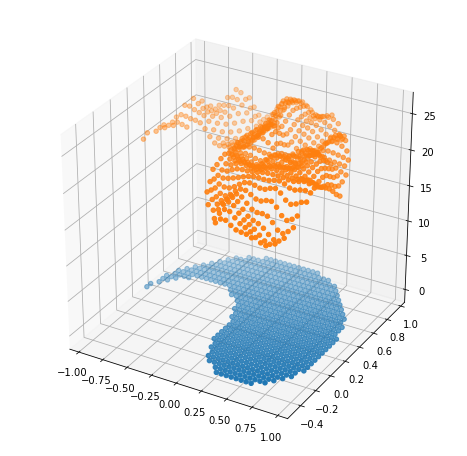

In [468]:
figsize(8, 8)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(*X[mask].T);
ax.scatter(*X[mask].T, 20 + Y[mask]);

In [469]:
Yi = griddata((x_, y_), Y, (x, y), method='cubic')

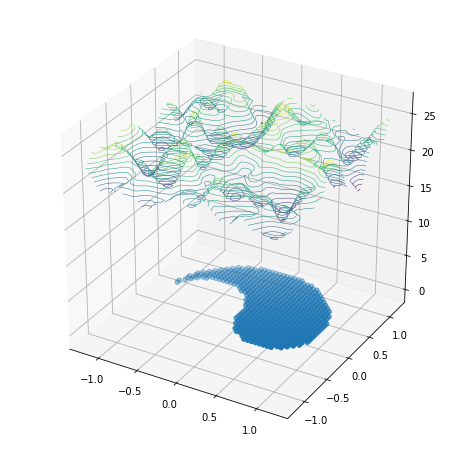

In [470]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(*X[mask].T);
CS = plt.contour(x, y, 20 + Yi, 15, linewidths=0.5, color='k')


In [471]:
import matplotlib.tri as mtri

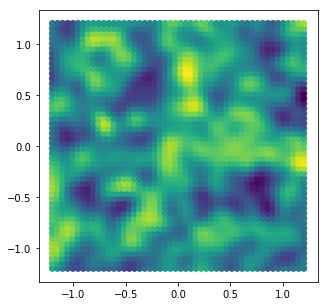

In [472]:
figsize(5, 5)
plt.scatter(x_, y_, c=Y)

In [473]:
tri = mtri.Triangulation(x_[mask], y_[mask])

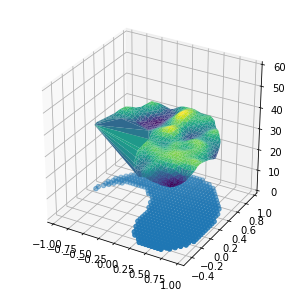

In [474]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d', )
ax.scatter(*X[mask].T);
ax.plot_trisurf(tri, 30 + Y[mask], cmap=plt.cm.viridis)
#ax.set_zlim(0, 100);
#ax.set_axis_off();
ax.set_zlim(0, 60);

In [475]:
tri_mask = tri.x[tri.triangles].std(1) > 0.05

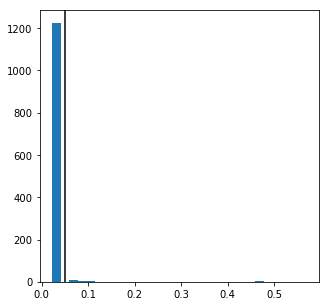

In [476]:
plt.hist(tri.x[tri.triangles].std(1), bins=30);
plt.axvline(0.05, c='k');

In [477]:
tri.set_mask(tri_mask)

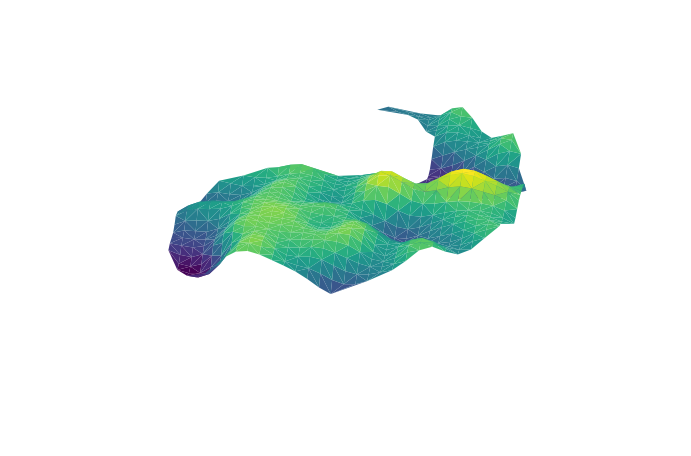

In [509]:
figsize(12, 8)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d', )

idx = np.random.choice(np.arange(mask.sum()), 500, replace=False)
#ax.scatter3D(*X[mask][idx].T, c='k');

#ax.plot3D(xx, np.sqrt(1 - xx ** 2), c='k')
#ax.plot3D(xx / 2 - 0.5, np.sqrt(1 - xx ** 2) / 2, c='k')
#ax.plot3D(xx / 2 + 0.5, -np.sqrt(1 - xx ** 2) / 2, c='k');

ax.plot_trisurf(tri, 10 + Y[mask], cmap=plt.cm.viridis)
ax.set_axis_off();
ax.set_zlim(0, 16);
ax.view_init(55, 10)
#ax.grid(False);
plt.savefig('3d-surface.pdf')

In [246]:
Yi = Y.copy()
Yi[~mask] = 0

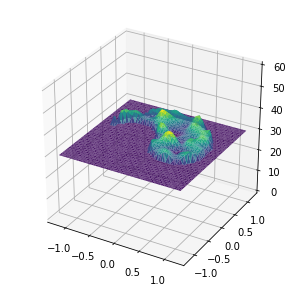

In [272]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d', )
#ax.scatter(*X[mask].T);
ax.plot_trisurf(x_, y_, 30 + Yi, cmap=plt.cm.viridis)
ax.set_zlim(0, 60);

In [260]:
tri = mtri.Triangulation(x_, y_)

In [263]:
tri.triangles

array([[1898, 1849, 1899],
       [1848, 1849, 1898],
       [2487, 2486, 2437],
       ..., 
       [ 333,  283,  284],
       [ 333,  332,  282],
       [ 282,  283,  333]], dtype=int32)

In [266]:
tri.triangles

array([[1898, 1849, 1899],
       [1848, 1849, 1898],
       [2487, 2486, 2437],
       ..., 
       [ 333,  283,  284],
       [ 333,  332,  282],
       [ 282,  283,  333]], dtype=int32)

In [267]:
tri.edges

array([[   1,    0],
       [   2,    1],
       [   3,    2],
       ..., 
       [2499, 2448],
       [2499, 2449],
       [2499, 2498]], dtype=int32)

In [268]:
tri.x

array([-1.2       , -1.15102041, -1.10204082, ...,  1.10204082,
        1.15102041,  1.2       ])

In [3]:
import SpatialDE as sde

In [455]:
from seaborn import desaturate

In [458]:
plt.style.use('default')

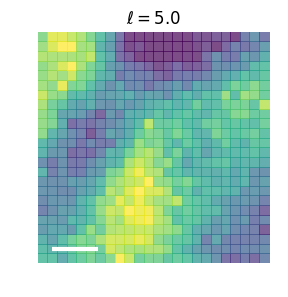

In [955]:
figsize(3, 3)

xmin=5
xmax=30
ymin=5
ymax=30

x = np.linspace(xmin, xmax, 25)
y = np.linspace(ymin, ymax, 25)

X1, X2 = np.meshgrid(x, y)
X = np.vstack((X1.flatten(), X2.flatten())).T

i = 0
ls = 5.
K = sde.base.SE_kernel(X, ls)
I = np.eye(K.shape[0])
Y = np.random.multivariate_normal(0 * X[:, 0] + 2.5, 2. * (0.95 * K + 0.05 * I))

# plt.subplot(1, len(ls_list), i + 1)
plt.pcolormesh(X1, X2, Y.reshape(X1.shape), alpha=0.7, vmin=0, vmax=5)
# plt.contour(X1, X2, Y.reshape(X1.shape))
plt.axis('equal')
plt.title('$ \ell = {} $'.format(ls));
plt.axis('off');

plt.hlines(6.5, 6.5, 11.5, color='w', lw=3);
# plt.annotate('5 units', (6.5, 7.), color='w', size=9)
plt.savefig(f'example_se_{ls}.pdf')

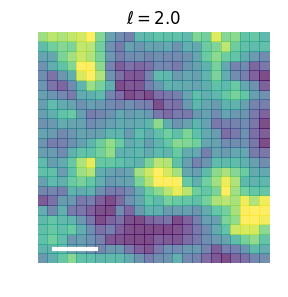

In [962]:
figsize(3, 3)

xmin=5
xmax=30
ymin=5
ymax=30

x = np.linspace(xmin, xmax, 25)
y = np.linspace(ymin, ymax, 25)

X1, X2 = np.meshgrid(x, y)
X = np.vstack((X1.flatten(), X2.flatten())).T

i = 0
ls = 2.
K = sde.base.SE_kernel(X, ls)
I = np.eye(K.shape[0])
Y = np.random.multivariate_normal(0 * X[:, 0] + 2.5, 2. * (0.95 * K + 0.05 * I))

# plt.subplot(1, len(ls_list), i + 1)
plt.pcolormesh(X1, X2, Y.reshape(X1.shape), alpha=0.7, vmin=0, vmax=5)
# plt.contour(X1, X2, Y.reshape(X1.shape))
plt.axis('equal')
plt.title('$ \ell = {} $'.format(ls));
plt.axis('off');

plt.hlines(6.5, 6.5, 11.5, color='w', lw=3);
# plt.annotate('5 units', (6.5, 7.), color='w', size=9)
plt.savefig(f'example_se_{ls}.pdf')

In [963]:
!ls

Example Spatial Patterns.ipynb example_se_5.0.pdf
P-value estimation.ipynb       example_se_{ls}.pdf
example_se_2.0.pdf


/Users/vale/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:18: RuntimeWarning: covariance is not positive-semidefinite.


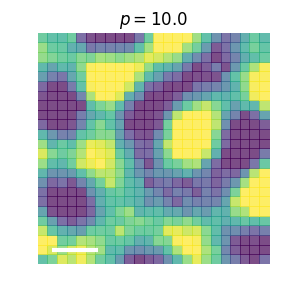

In [964]:
figsize(3, 3)

xmin=5
xmax=30
ymin=5
ymax=30

x = np.linspace(xmin, xmax, 25)
y = np.linspace(ymin, ymax, 25)

X1, X2 = np.meshgrid(x, y)
X = np.vstack((X1.flatten(), X2.flatten())).T

i = 0
p = 10.
K = sde.base.cosine_kernel(X, p)
I = np.eye(K.shape[0])
Y = np.random.multivariate_normal(0 * X[:, 0] + 2.5, 2. * (0.95 * K + 0.05 * I))

# plt.subplot(1, len(ls_list), i + 1)
plt.pcolormesh(X1, X2, Y.reshape(X1.shape), alpha=0.7, vmin=0, vmax=5)
# plt.contour(X1, X2, Y.reshape(X1.shape))
plt.axis('equal')
plt.title('$ p = {} $'.format(p));
plt.axis('off');

plt.hlines(6.5, 6.5, 11.5, color='w', lw=3);
plt.savefig(f'example_per_{p}.pdf')

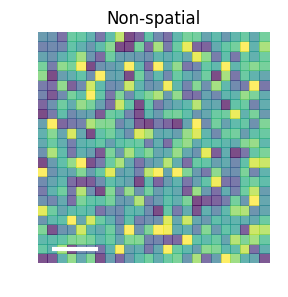

In [969]:
figsize(3, 3)

xmin=5
xmax=30
ymin=5
ymax=30

x = np.linspace(xmin, xmax, 25)
y = np.linspace(ymin, ymax, 25)

X1, X2 = np.meshgrid(x, y)
X = np.vstack((X1.flatten(), X2.flatten())).T

i = 0
ls = 2.
K = sde.base.SE_kernel(X, ls)
I = np.eye(K.shape[0])
Y = np.random.multivariate_normal(0 * X[:, 0] + 2.5, 2. * (0.0 * K + 1.0 * I))

# plt.subplot(1, len(ls_list), i + 1)
plt.pcolormesh(X1, X2, Y.reshape(X1.shape), alpha=0.7, vmin=0, vmax=5)
# plt.contour(X1, X2, Y.reshape(X1.shape))
plt.axis('equal')
plt.title('Non-spatial');
plt.axis('off');

plt.hlines(6.5, 6.5, 11.5, color='w', lw=3);
# plt.annotate('5 units', (6.5, 7.), color='w', size=9)
plt.savefig(f'example_null.pdf')

In [473]:
cm.viridis(Y).app

array([[ 0.993248,  0.906157,  0.143936,  1.      ],
       [ 0.993248,  0.906157,  0.143936,  1.      ],
       [ 0.993248,  0.906157,  0.143936,  1.      ],
       ..., 
       [ 0.993248,  0.906157,  0.143936,  1.      ],
       [ 0.993248,  0.906157,  0.143936,  1.      ],
       [ 0.993248,  0.906157,  0.143936,  1.      ]])

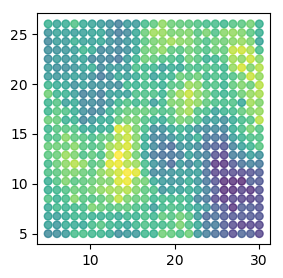

In [531]:
norm = mpl.colors.Normalize(vmin=0,vmax=5)
C = np.apply_along_axis(lambda x: desaturate(x, 1), 1, cm.viridis(norm(Y)))
plt.scatter(X[:, 0], X[:, 1], c=C, s=30, marker='o', alpha=0.75);

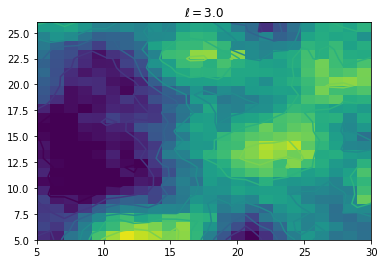

In [378]:
xmin=5
xmax=30
ymin=5
ymax=26

x = np.linspace(xmin, xmax, 25)
y = np.linspace(ymin, ymax, 25)

X1, X2 = np.meshgrid(x, y)
X = np.vstack((X1.flatten(), X2.flatten())).T

i = 0
ls = 3.
K = sde.base.SE_kernel(X, ls)
I = np.eye(K.shape[0])
Y = np.random.multivariate_normal(0 * X[:, 0] + 2.5, 0.95 * K + 0.05 * I)

# plt.subplot(1, len(ls_list), i + 1)
plt.pcolormesh(X1, X2, Y.reshape(X1.shape), vmin=0, vmax=5)
plt.contour(X1, X2, Y.reshape(X1.shape), vmin=0, vmax=5)
# plt.axis('equal')
plt.title('$ \ell = {} $'.format(ls));

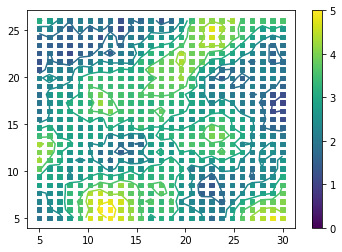

In [354]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=20, marker='s', vmin=0, vmax=5)
plt.colorbar();
plt.contour(X1, X2, np.abs(Y.reshape(X1.shape)), vmin=0, vmax=5);

In [428]:
25 ** 2

625

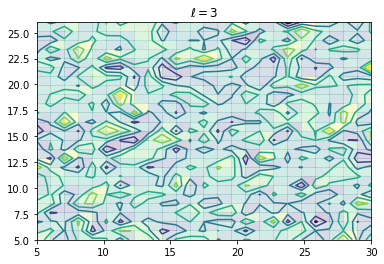

In [433]:
ls_list=[3, 10, 30, 100]
xmin=5
xmax=30
ymin=5
ymax=26

x = np.linspace(xmin, xmax, 25)
y = np.linspace(ymin, ymax, 25)

X1, X2 = np.meshgrid(x, y)
X = np.vstack((X1.flatten(), X2.flatten())).T

i = 0
ls = ls_list[0]
K = sde.base.SE_kernel(X, ls)
I = np.eye(K.shape[0])
Y = np.random.multivariate_normal(0 * X[:, 0] + 2.5, I)

# plt.subplot(1, len(ls_list), i + 1)
plt.pcolormesh(X1, X2, Y.reshape(X1.shape), vmin=0, vmax=5, alpha=0.2)
plt.contour(X1, X2, Y.reshape(X1.shape), vmin=0, vmax=5)
# plt.axis('equal')
plt.title('$ \ell = {} $'.format(ls));

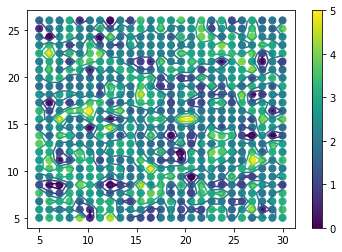

In [380]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, vmin=0, vmax=5)
plt.colorbar();
plt.contour(X1, X2, np.abs(Y.reshape(X1.shape)));